In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Load the dataset
df = pd.read_csv('/content/cardio_train.csv', delimiter=';')

In [ ]:
# Data Pre-processing
# Convert age from days to years for better interpretation
df['age_years'] = df['age'] / 365.25

# Removing outliers based on blood pressure readings
df_cleaned = df[(df['ap_hi'] >= 70) & (df['ap_hi'] <= 250) & (df['ap_lo'] >= 40) & (df['ap_lo'] <= 180)]

# Standardizing continuous features
features_to_scale = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']
scaler = StandardScaler()
df_cleaned[features_to_scale] = scaler.fit_transform(df_cleaned[features_to_scale])

<ipython-input-3-ebc19dd35b92>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[features_to_scale] = scaler.fit_transform(df_cleaned[features_to_scale])


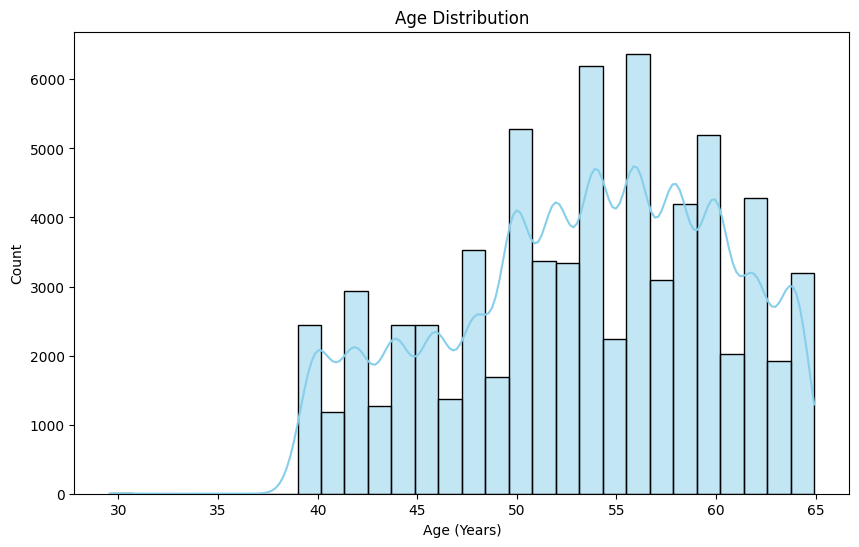

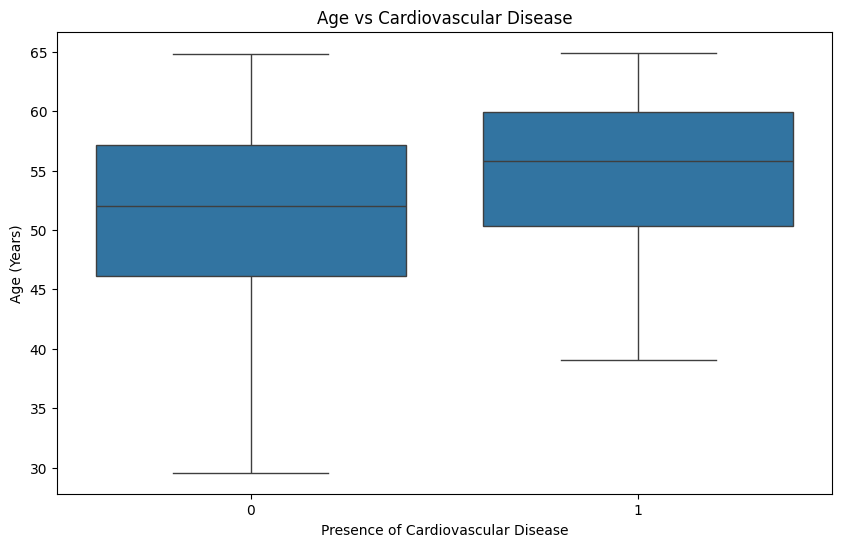

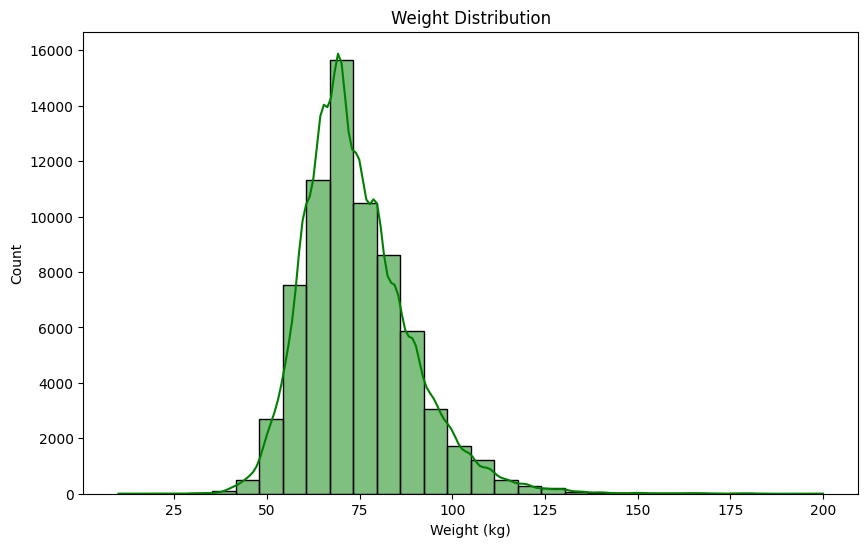

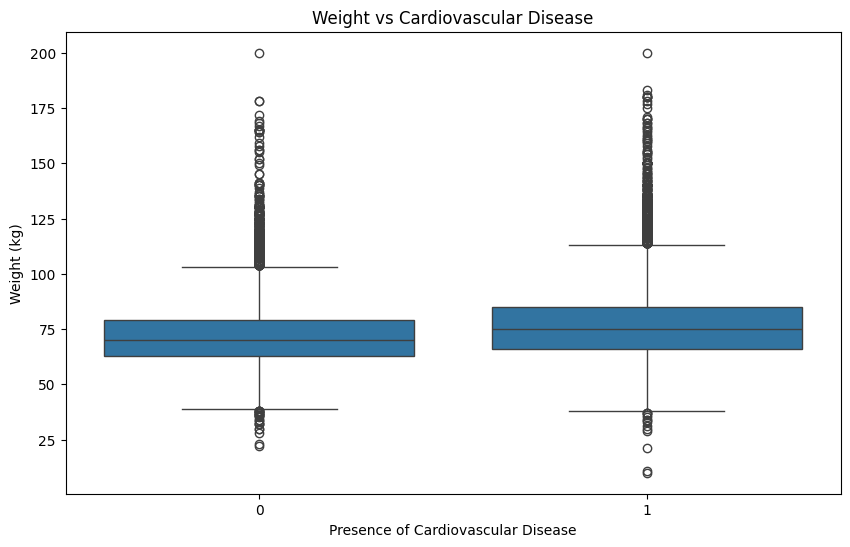

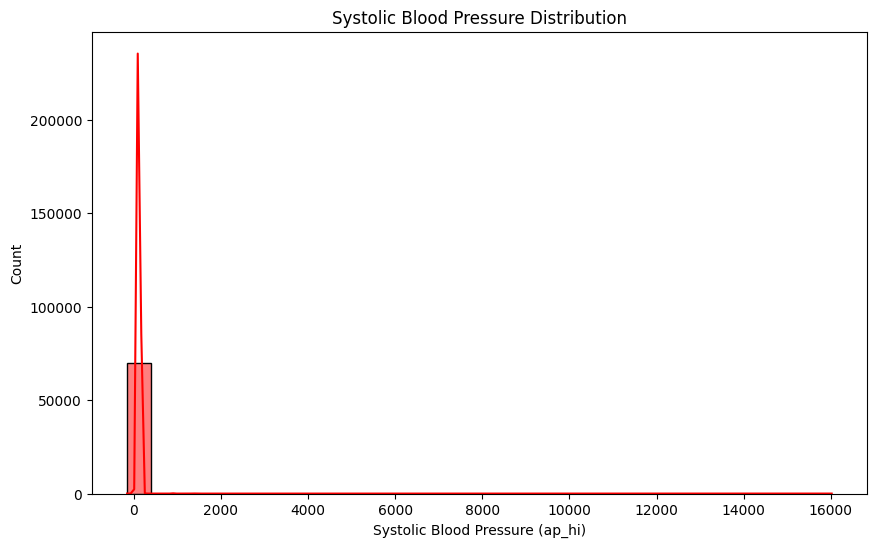

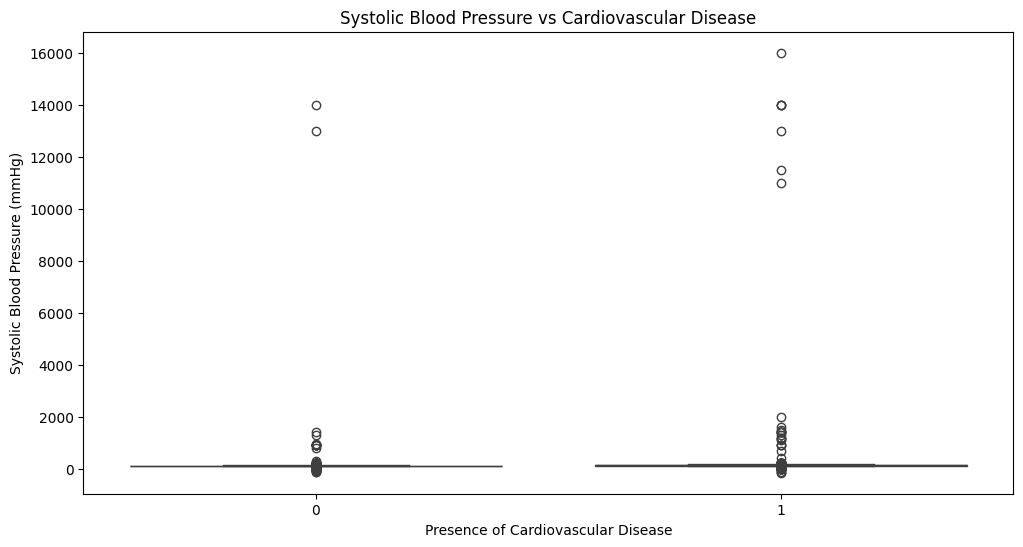

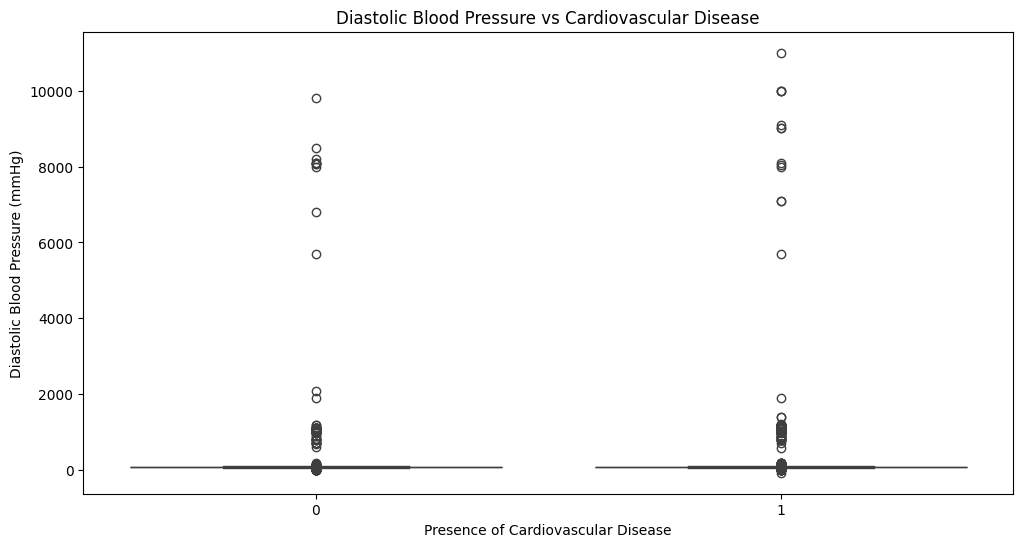

In [ ]:
# Data Analysis and Visualization
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age_years'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

# Relationship between Age and Cardiovascular Disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='age_years', data=df)
plt.title('Age vs Cardiovascular Disease')
plt.xlabel('Presence of Cardiovascular Disease')
plt.ylabel('Age (Years)')
plt.show()

# Distribution of Weight
plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], bins=30, kde=True, color='green')
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

# Relationship between Weight and Cardiovascular Disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='weight', data=df)
plt.title('Weight vs Cardiovascular Disease')
plt.xlabel('Presence of Cardiovascular Disease')
plt.ylabel('Weight (kg)')
plt.show()

# Blood pressure distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ap_hi'], bins=30, kde=True, color='red')
plt.title('Systolic Blood Pressure Distribution')
plt.xlabel('Systolic Blood Pressure (ap_hi)')
plt.ylabel('Count')
plt.show()

# Relationship between Systolic Blood Pressure and Cardiovascular Disease
plt.figure(figsize=(12, 6))
sns.boxplot(x='cardio', y='ap_hi', data=df)
plt.title('Systolic Blood Pressure vs Cardiovascular Disease')
plt.xlabel('Presence of Cardiovascular Disease')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.show()

# Relationship between Diastolic Blood Pressure and Cardiovascular Disease
plt.figure(figsize=(12, 6))
sns.boxplot(x='cardio', y='ap_lo', data=df)
plt.title('Diastolic Blood Pressure vs Cardiovascular Disease')
plt.xlabel('Presence of Cardiovascular Disease')
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.show()

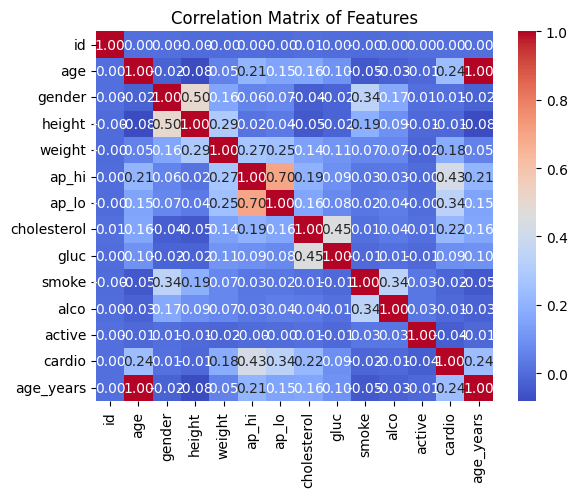

In [ ]:
# Correlation Matrix
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# Assuming 'df' as DataFrame and the last column is the target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Correcting label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining and training models
models = {
    'SVC': SVC(kernel='rbf', random_state=0),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=0),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=0),
    'KNN': KNeighborsClassifier()
}

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    accuracy_train = (confusion_matrix(y_train, y_pred_train).trace()) / len(y_train)
    accuracy_test = (confusion_matrix(y_test, y_pred_test).trace()) / len(y_test)

    print(f'{name} training accuracy: {accuracy_train:.4f}')
    print(f'{name} test accuracy: {accuracy_test:.4f}\n')